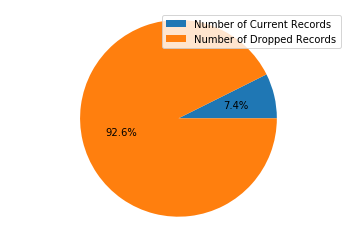

In [68]:
#Task 1: Data Retrieving and Preparation

#First need to sanity check and check for errors or typos
#importing packages
import numpy as np
import pandas as pd

#read the csv
df = pd.read_csv("AdultData.csv",sep = None, engine = 'python',header = None, decimal = '.', names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income' ]  )
#read the columns 
df.dtypes
#checking the count of the columns
df.count()
#checking age range first
dfAge = df['age']
dfAgeRangeCheck = dfAge.between(16,100)
dfAgeRangeCheck[dfAgeRangeCheck[:] == False]
#no value that is outside of range 16 and 100
#Next to check the workclass
df['workclass'].value_counts()
#number of missing values
mv=1836
#remove whitespace
df['workclass']=df['workclass'].str.strip()
#total counts of dataset
df.count()
#calculate the percentage of missing values
p = (1836.0/32561)
#p=0.056 which means only 5.6% values have missed. It is very insignificant, so we will drop them
df = df[df["workclass"] != "?" ]
# we can see that there are a few missing values
#Next is fnlwgt
dfFinalWeight = df['fnlwgt']
df[df['fnlwgt'].isnull()]
#continuous variable with no nulls
#Next is education
dfEducation = df['education']
df['education']=df['education'].str.strip()
dfEducation.value_counts()
#check No nulls
df[dfEducation.isnull()]
#no nulls next is education-num
dfEducationNum = df['education-num']
dfEducationNum.value_counts()
#no null variables
#Next is marital-status
dfMaritalStatus = df['marital-status']
dfMaritalStatus.value_counts()
#no missing variables. Onto occupation
df['occupation'].value_counts()
#total number of missing values
mv=mv+7
#remove whitespace
df['occupation']=df['occupation'].str.strip()
#total counts of dataset
df.count()
#calculate the percentage of missing values
p = (7.0/30725)
#p=0.00022 which means only 5.6% values have missed. It is very insignificant, so we will drop them
df = df[df["occupation"] != "?" ]
#next is relationship
dfRelationship = df['relationship']
dfRelationship.value_counts()
#no missing values,
#next we move onto race
dfRace = df['race']
dfRace.value_counts()
#no missing values, so onto the next variable 
dfSex = df['sex']
dfSex.value_counts()
#no missing variables, so onto the next of capital-gain 0 or above
dfCapitalGain = df['capital-gain']
dfCapitalGainCheck = dfCapitalGain.between(0,999999)
dfCapitalGainCheck[dfCapitalGainCheck[:] == False]
#capital-loss check 0 or above
dfCapitalLoss = df['capital-loss']
dfCapitalLossCheck = dfCapitalLoss.between(0,999999)
dfCapitalLossCheck[dfCapitalLossCheck[:] == False]
#checking if hours per week is at least 0 and above
dfHoursPerWeek = df['hours-per-week']
dfHoursPerWeekCheck = dfHoursPerWeek.between(0,9999999)
dfHoursPerWeekCheck[dfHoursPerWeekCheck[:] == False]
#checking native countries, 556 records of '?' values
df['native-country'].value_counts()
#total number of missing values
mv=mv+556
#remove whitespace
df['native-country']=df['native-country'].str.strip()
#total counts of dataset, total records is 30178
df.count()
#calculate the percentage of missing values
p = (556.0/30178)
#p=0.0184 which means only 5.6% values have missed. It is very insignificant, so we will drop them
df = df[df["native-country"] != "?" ]
#Plot to show how many records have been deleted vs. current number of records
plt.pie([mv, df.shape[0]],autopct='%1.1f%%', shadow=False)
plt.legend(['Number of Current Records', 'Number of Dropped Records'])
plt.axis('equal')
plt.show()
#after drop missing values, data are still big enough to further investigate.

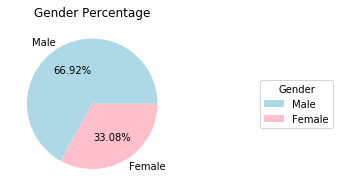

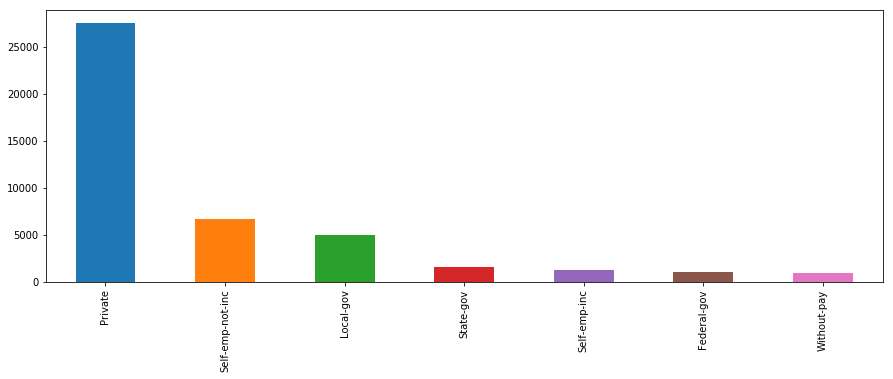

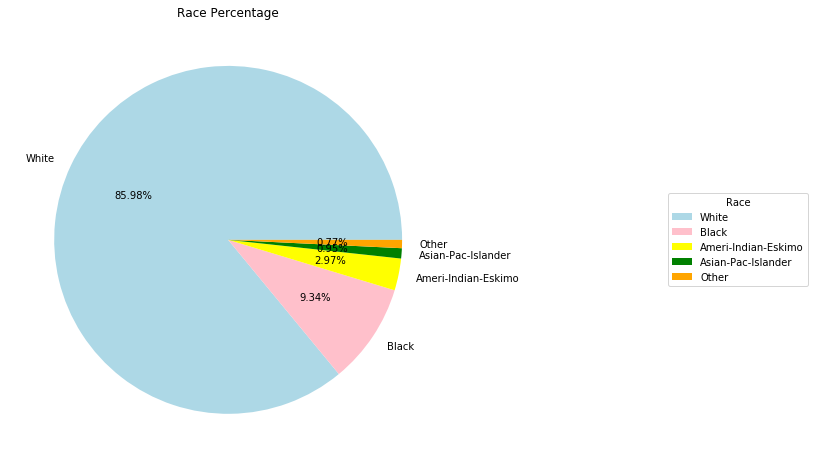

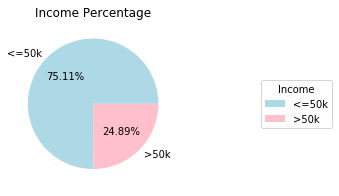

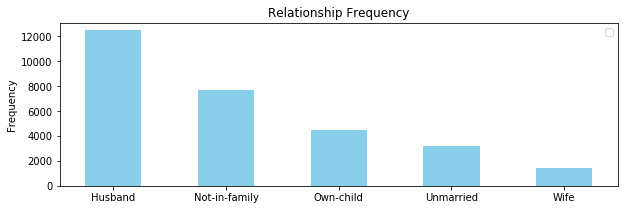

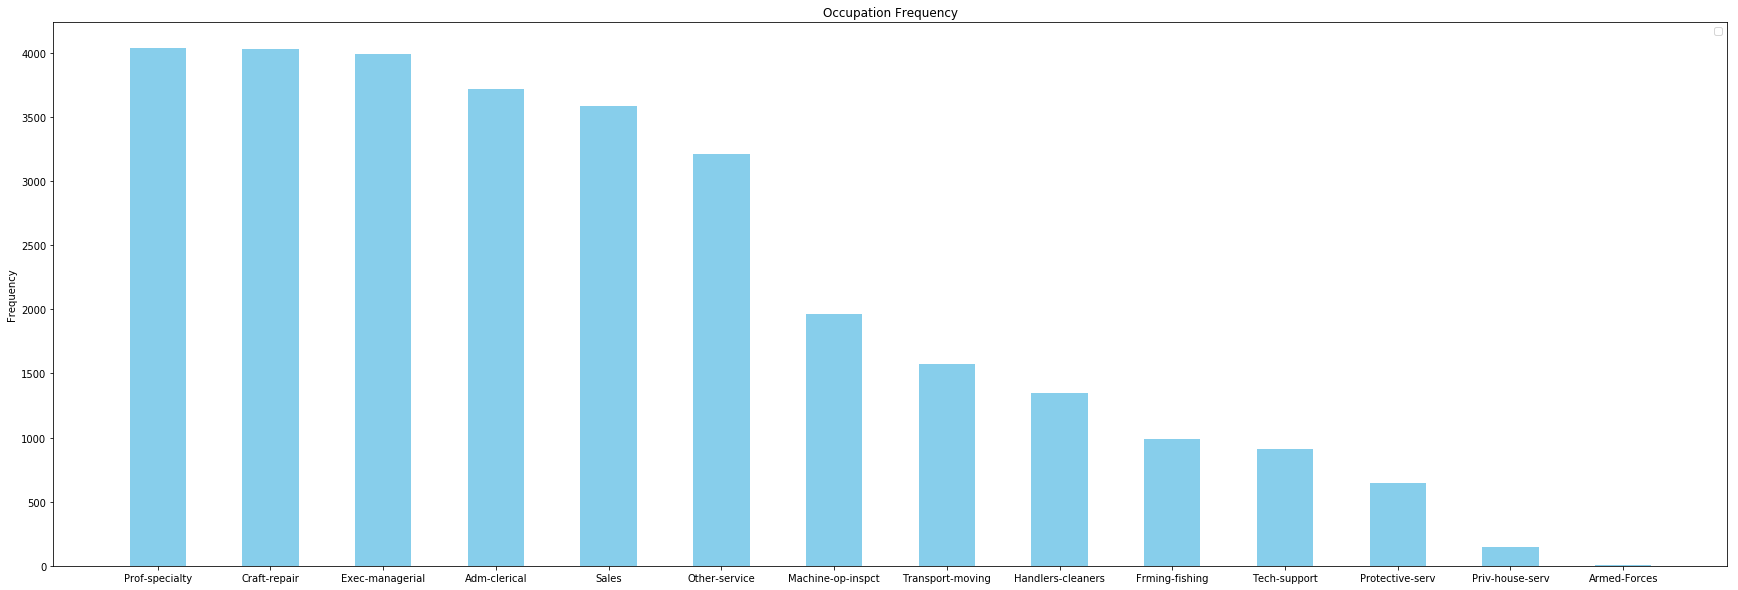

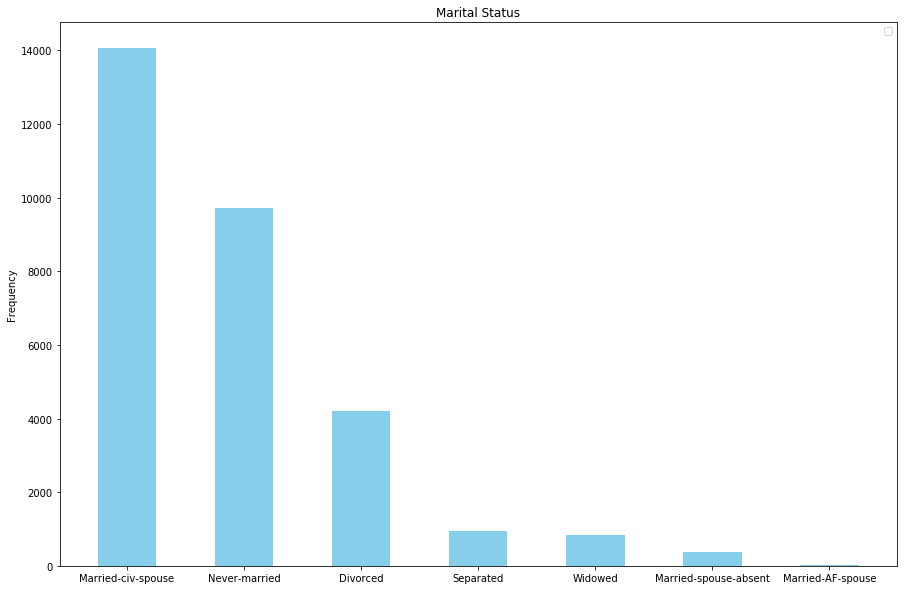

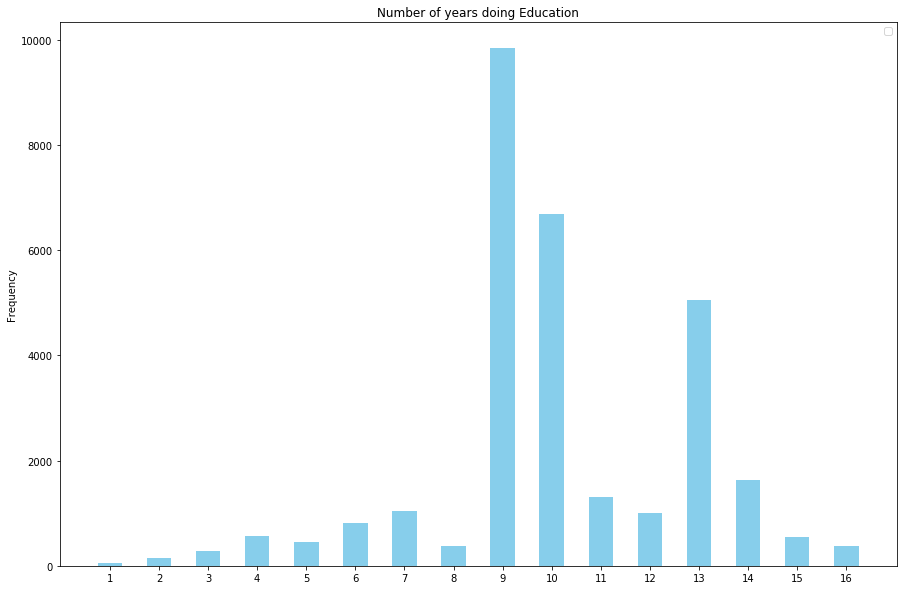

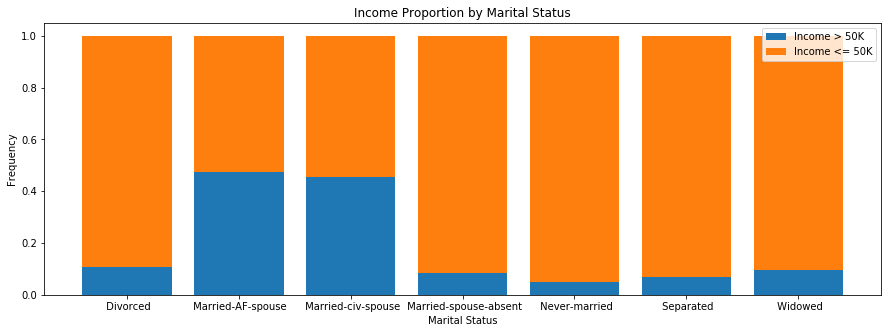

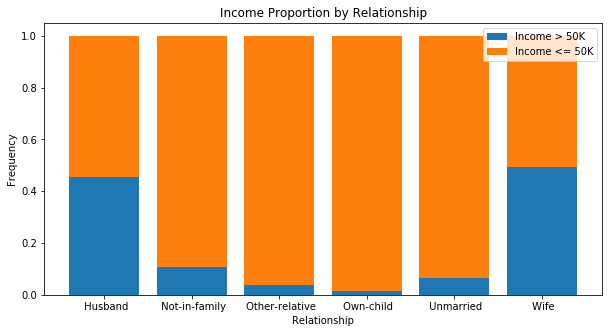

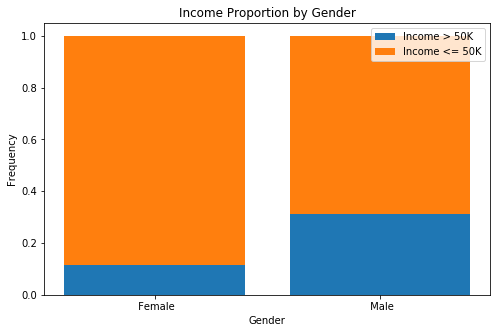

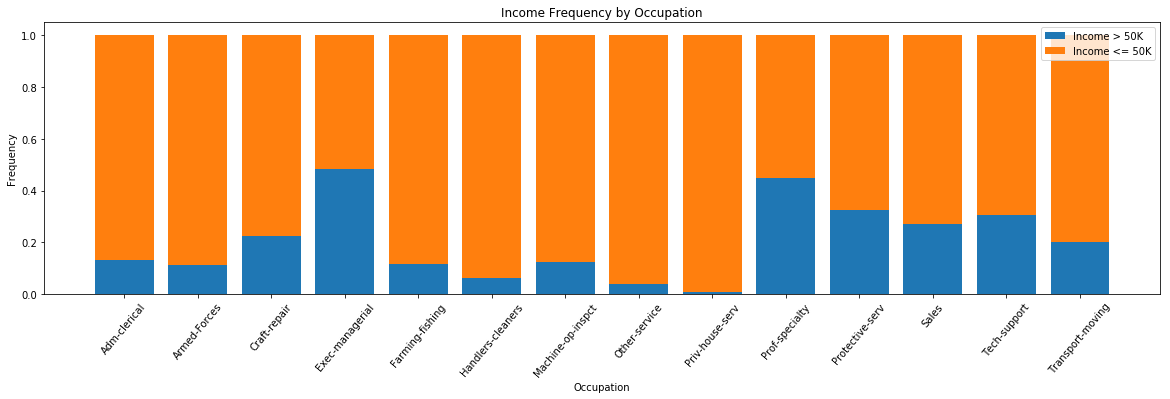

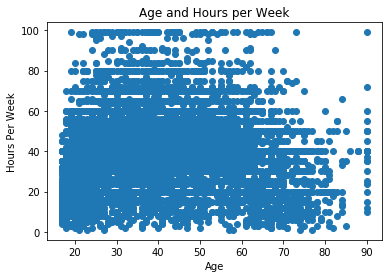

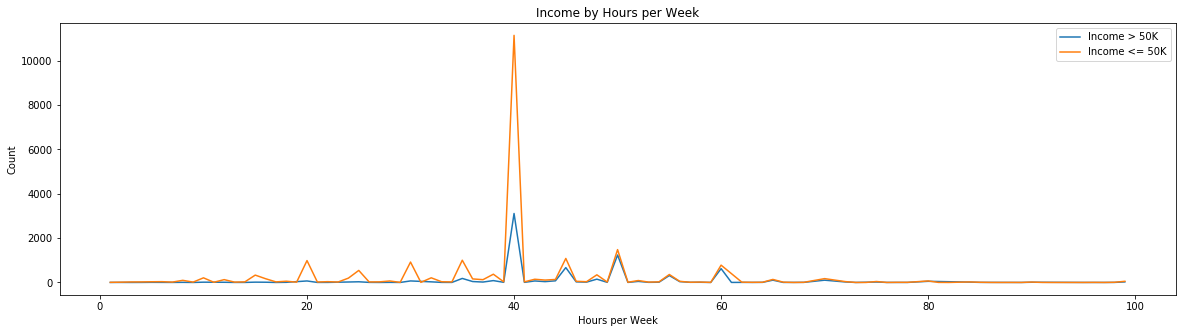

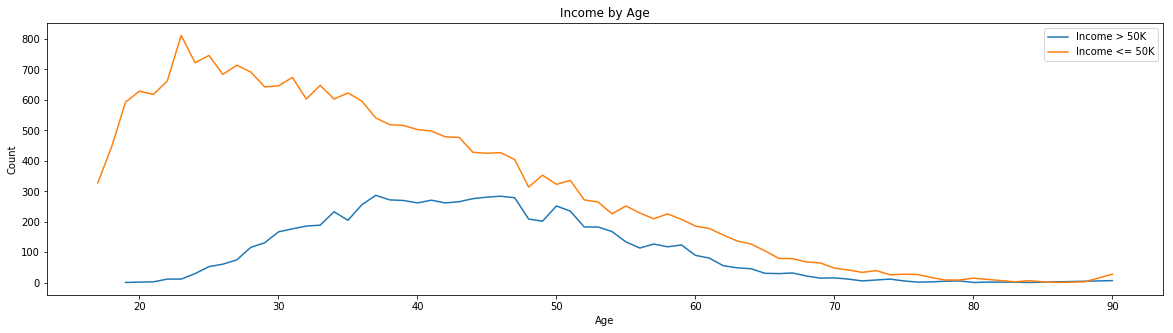

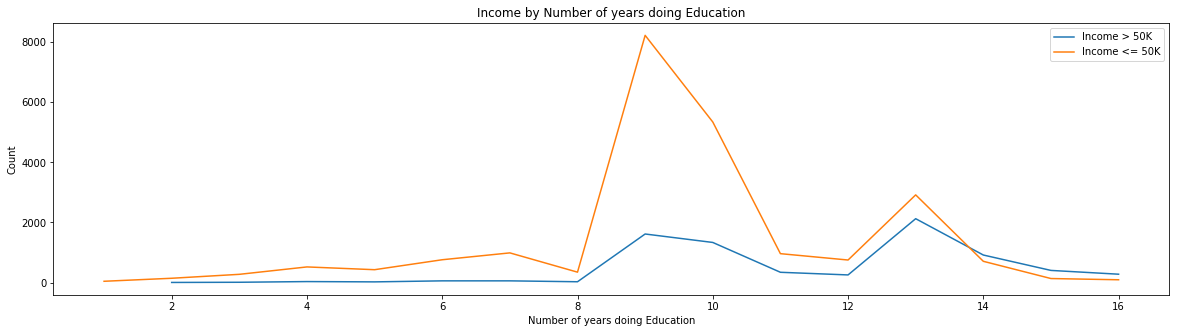

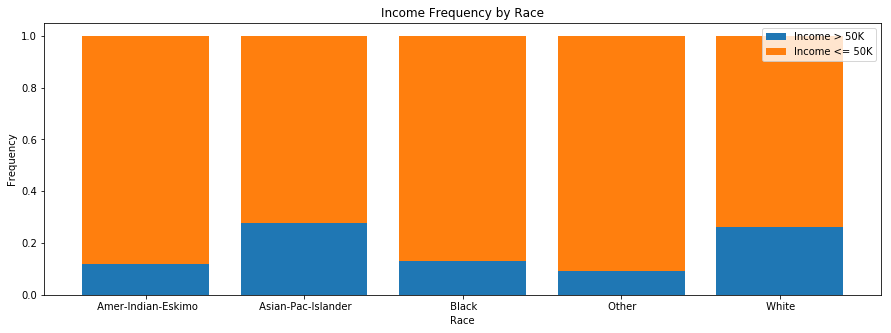

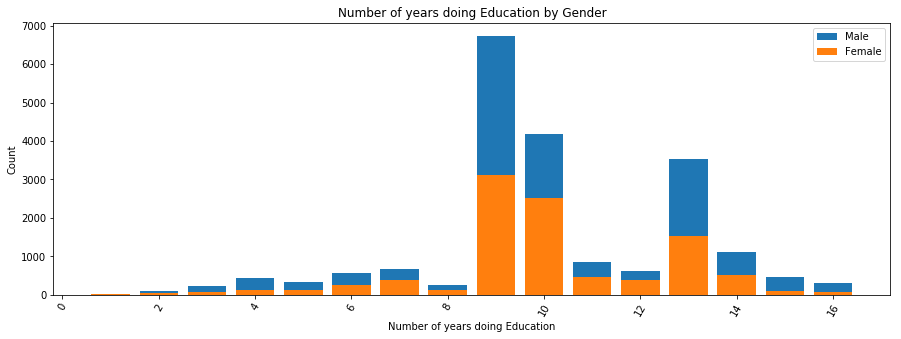

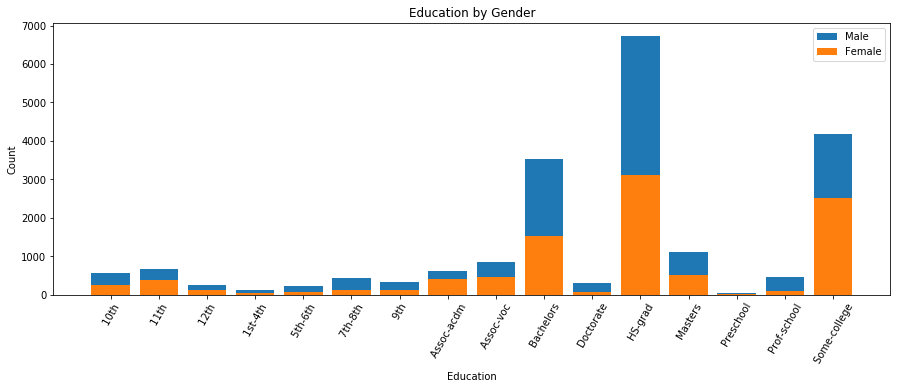

In [18]:
#Task 2: Data Exploration

#importing packages
import matplotlib.pyplot as plt
import pylab
sexObject = ('Male', 'Female')
sexValues = df['sex'].value_counts()
sexValues
#creating the pie chart
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
labels= 'Male', 'Female'
sizes = np.array([21790,10771])
colors =['lightblue','pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', shadow=False)
ax.legend(labels,title="Gender",loc="center left",bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title("Gender Percentage")
plt.show()

#Make Native-country piechart
df['native-country'].value_counts().plot(kind = 'bar',figsize=(15,5))
#plot education
df['education'].value_counts().plot(kind = 'bar')
#plot workclass
df['workclass'].value_counts().plot(kind = 'bar')
#plot race
labels = ['White', 'Black', 'Ameri-Indian-Eskimo', 'Asian-Pac-Islander','Other']
raceCount = df['race'].value_counts()
raceCount
#creating the pie chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
sizes = np.array([raceCount[0],raceCount[1],raceCount[2],raceCount[3],raceCount[4]])
colors =['lightblue','pink','yellow', 'green', 'orange']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.2f%%', shadow=False)
ax.legend(labels,title="Race",loc="center left", bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title("Race Percentage")
plt.show()

#Income
#plot race
labels = ['<=50k', '>50k']
dfIncome = df['income'].value_counts()
dfIncome
#creating the pie chart
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
sizes = np.array([dfIncome[0], dfIncome[1]])
colors =['lightblue','pink']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=False)
ax.legend(labels,
          title="Income",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))
ax.set_title("Income Percentage")
plt.show()

#Relationship
dfRelationship = df['relationship'].value_counts()
dfRelationship
#Displaying Relationship
label = 'Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'
values =([dfRelationship[0],dfRelationship[1], dfRelationship[2], dfRelationship[3], dfRelationship[4]])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))
fig, ax = plt.subplots(figsize=(10, 3))
rect = ax.bar(index, values, width, color = 'SkyBlue')

ax.set_ylabel('Frequency')
ax.set_title('Relationship Frequency')
ax.set_xticks(index)
ax.set_xticklabels(('Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'))
ax.legend()
#Displaying Occupation
dfOccupation = df['occupation'].value_counts()
dfOccupation
#bar chart over occupation
labels = 'Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Frming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv','Armed-Forces'



values =([dfOccupation[0],dfOccupation[1],dfOccupation[2],dfOccupation[3],dfOccupation[4],dfOccupation[5],dfOccupation[6],dfOccupation[7],dfOccupation[8],dfOccupation[9],dfOccupation[10],dfOccupation[11],dfOccupation[12],dfOccupation[13]])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))
fig, ax = plt.subplots(figsize=(30, 10))

rect = ax.bar(index, values, width, color = 'SkyBlue')

ax.set_ylabel('Frequency')
ax.set_title('Occupation Frequency')
ax.set_xticks(index)
ax.set_xticklabels(('Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Frming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv','Armed-Forces'))
ax.legend()
#Bar chart over MaritalStatus
dfMaritalStatus = df['marital-status'].value_counts()
dfMaritalStatus
#bar chart over Marital Status
labels = 'Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'


values =([dfMaritalStatus[0],dfMaritalStatus[1],dfMaritalStatus[2],dfMaritalStatus[3],dfMaritalStatus[4],dfMaritalStatus[5],dfMaritalStatus[6] ])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))
fig, ax = plt.subplots(figsize=(15, 10))

rect = ax.bar(index, values, width, color = 'SkyBlue')

ax.set_ylabel('Frequency')
ax.set_title('Marital Status')
ax.set_xticks(index)
ax.set_xticklabels(('Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'))
ax.legend()
#Bar chart over Number of years spent in education
dfEducationNum = df['education-num'].value_counts()
dfEducationNum
#bar chart over Marital Status
labels = '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16'
values =([dfEducationNum[1],dfEducationNum[2],dfEducationNum[3],dfEducationNum[4], dfEducationNum[5],dfEducationNum[6],dfEducationNum[7],dfEducationNum[8],dfEducationNum[9],dfEducationNum[10],dfEducationNum[11],dfEducationNum[12],dfEducationNum[13],dfEducationNum[14],dfEducationNum[15],dfEducationNum[16]])
width = 0.50  # the width of the bars
#amount of seperate columns/location
index = np.arange(len(values))
fig, ax = plt.subplots(figsize=(15, 10))

rect = ax.bar(index, values, width, color = 'SkyBlue')

ax.set_ylabel('Frequency')
ax.set_title('Number of years doing Education')
ax.set_xticks(index)
ax.set_xticklabels(('1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16'))
ax.legend()
#group data by marital-status
grouped_marital_status = df.groupby('marital-status')
#get data where income are lower than 50K or greater than 50k and group them by marital-status
grouped_marital_status_1 = df[df['income'] == ' <=50K'].groupby('marital-status')
grouped_marital_status_2 = df[df['income'] == ' >50K'].groupby('marital-status')
#caculate the percentage of income (<=50K) for each group
ratio_marital_status_1=grouped_marital_status_1['income'].count()/grouped_marital_status['income'].count()
ratio_marital_status_2=grouped_marital_status_2['income'].count()/grouped_marital_status['income'].count()
# set the size of chart
ax = plt.subplots(figsize=(15,5))
p1=plt.bar(ratio_marital_status_2.index.get_values(),ratio_marital_status_2)
p2=plt.bar(ratio_marital_status_1.index.get_values(),ratio_marital_status_1,bottom = ratio_marital_status_2)
plt.ylabel('Frequency')
plt.xlabel('Marital Status')
plt.title('Income Proportion by Marital Status')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()
#group data by relationship
grouped_relationship = df.groupby('relationship')
#get data where income are lower than 50K or greater than 50k and group them by relationship
grouped_relationship_1 = df[df['income'] == ' <=50K'].groupby('relationship')
grouped_relationship_2 = df[df['income'] == ' >50K'].groupby('relationship')
#caculate the percentage of income (<=50K) for each group
ratio_relationship_1=grouped_relationship_1['relationship'].count()/grouped_relationship['income'].count()
ratio_relationship_2=grouped_relationship_2['relationship'].count()/grouped_relationship['income'].count()
# set the size of chart
ax = plt.subplots(figsize=(10,5))
p1=plt.bar(ratio_relationship_1.index.get_values(),ratio_relationship_2)
p2=plt.bar(ratio_relationship_1.index.get_values(),ratio_relationship_1,bottom = ratio_relationship_2)
plt.ylabel('Frequency')
plt.xlabel('Relationship')
plt.title('Income Proportion by Relationship')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()
#group data by SEX
grouped_sex = df.groupby('sex')
#get data where income are lower than 50K or greater than 50k and group them by sex
grouped_sex_1 = df[df['income'] == ' <=50K'].groupby('sex')
grouped_sex_2 = df[df['income'] == ' >50K'].groupby('sex')
#caculate the count of income (<=50K) for each group
ratio_sex_1=grouped_sex_1['sex'].count()/grouped_sex['sex'].count()
ratio_sex_2=grouped_sex_2['sex'].count()/grouped_sex['sex'].count()
# set the size of chart
ax = plt.subplots(figsize=(8,5))
p1=plt.bar(ratio_sex_2.index.get_values(),ratio_sex_2)
p2=plt.bar(ratio_sex_1.index.get_values(),ratio_sex_1,bottom = ratio_sex_2)
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Income Proportion by Gender')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()

#group data by occupation
grouped_occupation = df.groupby('occupation')
#get data where income are lower than 50K or greater than 50k and group them by occupation
grouped_occupation_1 = df[df['income'] == ' <=50K'].groupby('occupation')
grouped_occupation_2 = df[df['income'] == ' >50K'].groupby('occupation')
#caculate the count of income (<=50K) for each group
ratio_occupation_1=grouped_occupation_1['occupation'].count()/grouped_occupation['occupation'].count()
ratio_occupation_2=grouped_occupation_2['occupation'].count()/grouped_occupation['occupation'].count()
# set the size of chart
ax = plt.subplots(figsize=(20,5))
p1=plt.bar(ratio_occupation_2.index.get_values(),ratio_occupation_2)
p2=plt.bar(ratio_occupation_1.index.get_values(),ratio_occupation_1,bottom = ratio_occupation_2)
plt.ylabel('Frequency')
plt.xlabel('Occupation')
plt.xticks(rotation=50)
plt.title('Income Frequency by Occupation')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()
# Draw the scatter plot
plt.scatter(df['age'], df['hours-per-week'])
plt.title('Age and Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')
plt.show()
#group data by hours-per-week
grouped_hours = df.groupby('hours-per-week')
#get data where income are lower than 50K or greater than 50k and group them by hours-per-week
grouped_hours_1 = df[df['income'] == ' <=50K'].groupby('hours-per-week')
grouped_hours_2 = df[df['income'] == ' >50K'].groupby('hours-per-week')
#caculate the count of income (<=50K) for each group
ratio_hours_1=grouped_hours_1['hours-per-week'].count()
ratio_hours_2=grouped_hours_2['hours-per-week'].count()
# set the size of chart
ax = plt.subplots(figsize=(20,5))
p1=plt.plot(ratio_hours_2.index.get_values(),ratio_hours_2)
p2=plt.plot(ratio_hours_1.index.get_values(),ratio_hours_1)
plt.ylabel('Count')
plt.xlabel('Hours per Week')
plt.title('Income by Hours per Week')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()
#group data by age
grouped_age = df.groupby('age')
#get data where income are lower than 50K or greater than 50k and group them by age
grouped_age_1 = df[df['income'] == ' <=50K'].groupby('age')
grouped_age_2 = df[df['income'] == ' >50K'].groupby('age')
#caculate the count of income (<=50K) and (>50K) for each group
ratio_age_1=grouped_age_1['age'].count()
ratio_age_2=grouped_age_2['age'].count()
# set the size of chart
ax = plt.subplots(figsize=(20,5))
p1=plt.plot(ratio_age_2.index.get_values(),ratio_age_2)
p2=plt.plot(ratio_age_1.index.get_values(),ratio_age_1)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Income by Age')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()
#group data by Number of years doing Education
grouped_education_years = df.groupby('education-num')
#get data where income are lower than 50K or greater than 50k and group them by Number of years doing Education
grouped_education_years_1 = df[df['income'] == ' <=50K'].groupby('education-num')
grouped_education_years_2 = df[df['income'] == ' >50K'].groupby('education-num')
#caculate the count of income (<=50K) and (>50K) for each group
ratio_education_years_1=grouped_education_years_1['education-num'].count()
ratio_education_years_2=grouped_education_years_2['education-num'].count()
# set the size of chart
ax = plt.subplots(figsize=(20,5))
p1=plt.plot(ratio_education_years_2.index.get_values(),ratio_education_years_2)
p2=plt.plot(ratio_education_years_1.index.get_values(),ratio_education_years_1)
plt.ylabel('Count')
plt.xlabel('Number of years doing Education')
plt.title('Income by Number of years doing Education')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()
#group data by race
grouped_race = df.groupby('race')
#get data where income are lower than 50K or greater than 50k and group them by race
grouped_race_1 = df[df['income'] == ' <=50K'].groupby('race')
grouped_race_2 = df[df['income'] == ' >50K'].groupby('race')
#caculate the count of income (<=50K) and >50K for each group
ratio_race_1=grouped_race_1['race'].count()/grouped_race['race'].count()
ratio_race_2=grouped_race_2['race'].count()/grouped_race['race'].count()
# set the size of chart
ax = plt.subplots(figsize=(15,5))
p1=plt.bar(ratio_race_2.index.get_values(),ratio_race_2)
p2=plt.bar(ratio_race_1.index.get_values(),ratio_race_1,bottom = ratio_race_2)
plt.ylabel('Frequency')
plt.xlabel('Race')
plt.title('Income Frequency by Race')
plt.legend((p1[0], p2[0]), ('Income > 50K', 'Income <= 50K'))
plt.show()
#group data by education
grouped_edu = df.groupby('education-num')
#get data for male, female and group them by education
grouped_education_1 = df[df['sex'] == ' Male'].groupby('education-num')
grouped_education_2 = df[df['sex'] == ' Female'].groupby('education-num')
# # set the size of chart
ax = plt.subplots(figsize=(15,5))
plt.bar(grouped_education_1['education-num'].count().index.get_values(),grouped_education_1['education-num'].count())
plt.bar(grouped_education_2['education-num'].count().index.get_values(),grouped_education_2['education-num'].count())
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.xlabel('Number of years doing Education')
plt.title('Number of years doing Education by Gender')
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.show()
#group data by education
grouped_edu = df.groupby('education')
#get data for male, female and group them by education
grouped_education_1 = df[df['sex'] == ' Male'].groupby('education')
grouped_education_2 = df[df['sex'] == ' Female'].groupby('education')
# # set the size of chart
ax = plt.subplots(figsize=(15,5))
plt.bar(grouped_education_1['education'].count().index.get_values(),grouped_education_1['education'].count())
plt.bar(grouped_education_2['education'].count().index.get_values(),grouped_education_2['education'].count())
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.xlabel('Education')
plt.title('Education by Gender')
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.show()


In [88]:
#Task 3: Data Pre Processing

#have a look at data type
df.info()

#transform object to numeric values, since model cannot understand strings
#workclass
workclass={'Private':0,'Self-emp-not-inc':1,'Local-gov':2,'State-gov':3,'Self-emp-inc':4,'Federal-gov':5,'Without-pay':6}
df['workclass'] = [workclass[item] for item in df['workclass']] 

#education
education_name = df['education'].unique()
education={}
i=0
for value in education_name:
    education[value]=i
    i=i+1
df['education'] = [education[item] for item in df['education']] 

#marital status
marital_status_name = df['marital-status'].unique()
marital_status={}
i=0
for value in marital_status_name:
    marital_status[value]=i
    i=i+1
df['marital-status'] = [marital_status[item] for item in df['marital-status']] 


#occupation
occupation_name = df['occupation'].unique()
occupation={}
i=0
for value in occupation_name:
    occupation[value]=i
    i=i+1
df['occupation'] = [occupation[item] for item in df['occupation']] 

#relationship
relationship_name = df['relationship'].unique()
relationship={}
i=0
for value in relationship_name:
    relationship[value]=i
    i=i+1
df['relationship'] = [relationship[item] for item in df['relationship']] 


#race
race_name = df['race'].unique()
race={}
i=0
for value in race_name:
    race[value]=i
    i=i+1
df['race'] = [race[item] for item in df['race']] 

#sex
sex_name = df['sex'].unique()
sex={}
i=0
for value in sex_name:
    sex[value]=i
    i=i+1
df['sex'] = [sex[item] for item in df['sex']] 

#native-country
country_name = df['native-country'].unique()
country={}
i=0
for value in country_name:
    country[value]=i
    i=i+1
df['native-country'] = [country[item] for item in df['native-country']] 

#income
income_name = df['income'].unique()
income={}
i=0
for value in income_name:
    income[value]=i
    i=i+1
df['income'] = [income[item] for item in df['income']] 
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null int64
fnlwgt            30162 non-null int64
education         30162 non-null int64
education-num     30162 non-null int64
marital-status    30162 non-null int64
occupation        30162 non-null int64
relationship      30162 non-null int64
race              30162 non-null int64
sex               30162 non-null int64
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null int64
income            30162 non-null object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,3,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,0,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,0,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,0,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [91]:
#Task 4: Data Modeling

#importing packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#Split prediction variable and features
X = df.values[:, :-1]
y = df.values[:, -1]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

neiclassifier = KNeighborsClassifier(n_neighbors=5)  
neiclassifier.fit(train_X, train_y)
y_pred = neiclassifier.predict(val_X)


('Accuracy:', 0.7606418246916854)
